In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\sid10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

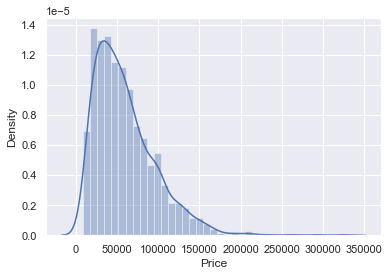

In [13]:
sns.distplot(df['Price'])

<AxesSubplot:>

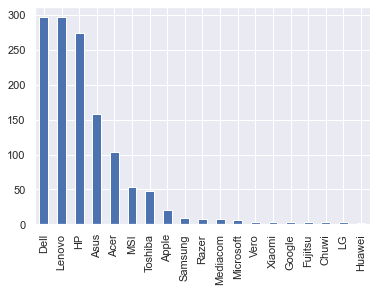

In [14]:
df['Company'].value_counts().plot(kind='bar')

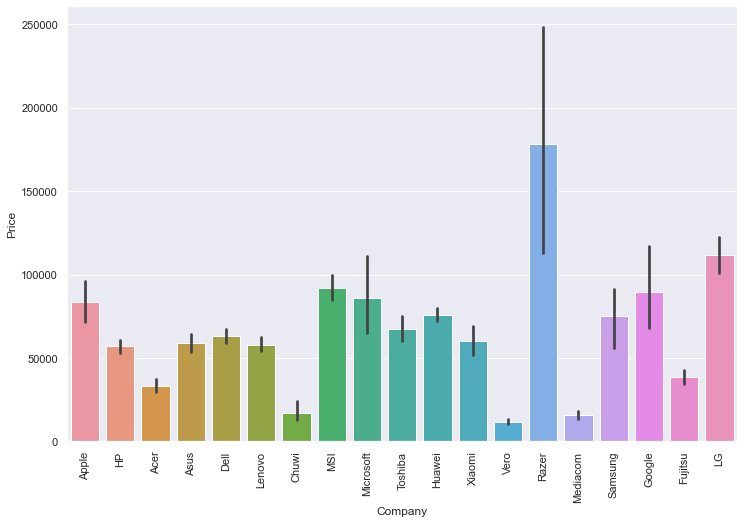

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

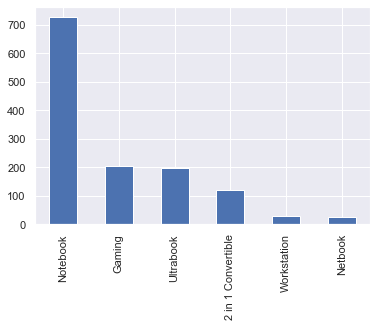

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

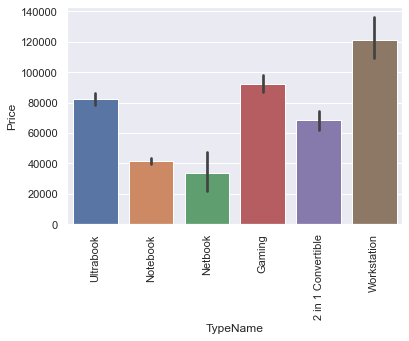

In [17]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Count'>

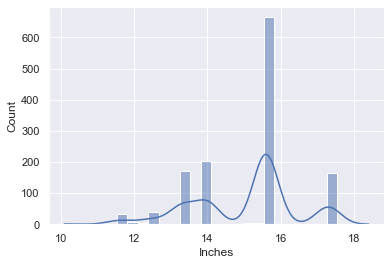

In [18]:
sns.histplot(df['Inches'],kde=True)

<AxesSubplot:xlabel='Inches', ylabel='Price'>

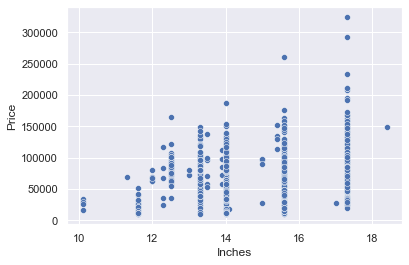

In [19]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,0
510,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,47898.72,1
1033,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.95,63669.60,0
1132,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.84,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.68,0
603,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,117162.72,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,66546.72,0
1084,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,39960.00,0
200,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,98301.60,0


In [23]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

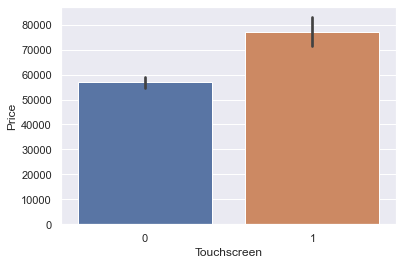

In [24]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [25]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
320,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,68837.76,0,0
111,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.12,1,0
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,111834.72,0,1
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.72,0,1
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,139593.60,0,1
1127,HP,Ultrabook,12.5,1366x768,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,100965.60,0,0
743,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.70,53226.72,1,0
134,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.05,31861.44,0,0
702,Lenovo,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8,1TB HDD,AMD Radeon R7,Windows 10,2.20,22857.12,0,0
613,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.25,19127.52,0,0


In [27]:
df['Ips'].value_counts()

0    938
1    365
Name: Ips, dtype: int64

<AxesSubplot:xlabel='Ips', ylabel='Price'>

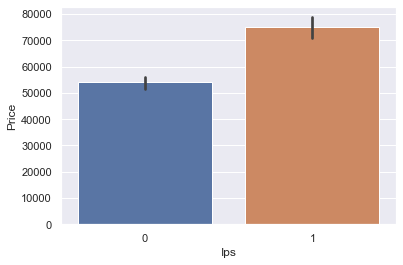

In [28]:
sns.barplot(x=df['Ips'],y=df['Price'])

<AxesSubplot:>

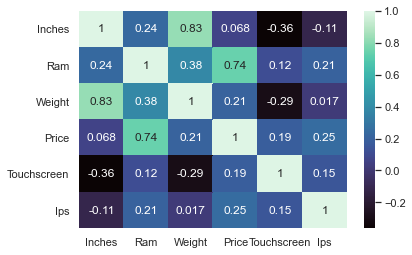

In [29]:
sns.heatmap(df.corr(), annot=True, cmap ='mako')

In [30]:
df.drop(columns=['ScreenResolution','Inches'],inplace=True)

In [31]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [32]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Samsung Cortex A72&A53 2.0GHz      1
Intel Core M m3 1.2GHz             1
AMD E-Series 6110 1.5GHz           1
Intel Core i3 6100U 2.1GHz         1
Intel Core i7 2.8GHz               1
Name: Cpu, Length: 118, dtype: int64

In [33]:
df['cpu_names'] = df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [34]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_names
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


In [35]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [36]:
df['cpu_name'] = df['cpu_names'].apply(processor)

In [37]:
df.drop(columns=['Cpu','cpu_names'], inplace = True)

In [38]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


In [39]:
df['cpu_name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: cpu_name, dtype: int64

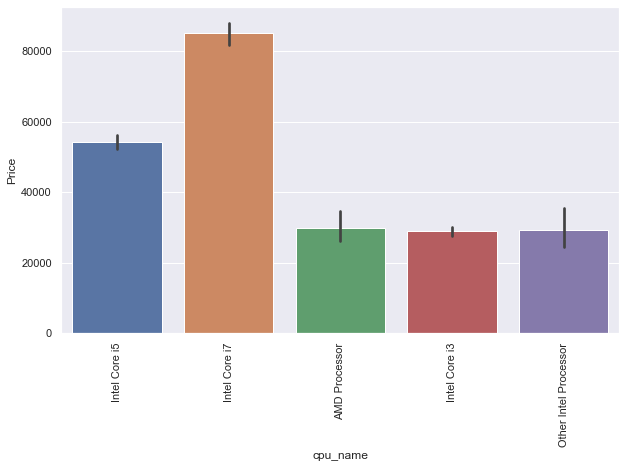

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['cpu_name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

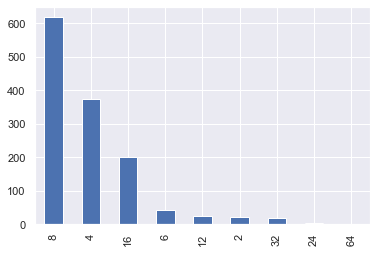

In [41]:
df['Ram'].value_counts().plot(kind='bar')

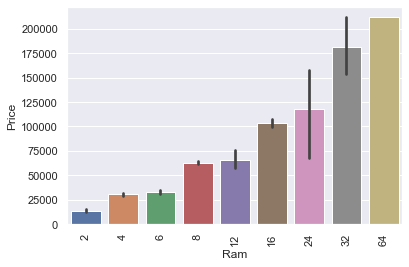

In [42]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
512GB SSD +  512GB SSD             1
8

In [44]:
df['Memory'].apply(lambda x:1 if 'Hybrid' in x else 0).value_counts()

0    1291
1      12
Name: Memory, dtype: int64

In [45]:
df['Memory'].apply(lambda x:1 if 'Flash Storage' in x else 0).value_counts()

0    1228
1      75
Name: Memory, dtype: int64

In [46]:
df['Memory_hybrid'] = df['Memory'].apply(lambda x:1 if 'Hybrid' in x else 0)

In [47]:
df['Memory_flash'] = df['Memory'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [48]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,Memory_hybrid,Memory_flash
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,0,1
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,0,0
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,0,0
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,Other Intel Processor,0,1
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,0,0


In [49]:
df = df[df.Memory_hybrid == 0]

In [50]:
df = df[df.Memory_flash == 0]

In [51]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,Memory_hybrid,Memory_flash
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,0
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,0,0
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,0,0
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,0,0
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,0,0


In [52]:
df.drop(columns=['Memory_flash','Memory_hybrid'], inplace = True)

In [53]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor
...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7


In [54]:
df['Memory'].astype(str).replace('\.0', '', regex=True)

0       128GB SSD
2       256GB SSD
3       512GB SSD
4       256GB SSD
5       500GB HDD
          ...    
1297    500GB HDD
1298    128GB SSD
1299    512GB SSD
1301      1TB HDD
1302    500GB HDD
Name: Memory, Length: 1216, dtype: object

In [55]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [56]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor
...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7


In [57]:
temp = df["Memory"].str.split("+", n = 1, expand = True)

In [58]:
temp.sample(10)

,0,1
683,256 SSD,None
13,256 SSD,None
1245,256 SSD,1000 HDD
574,500 HDD,None
95,256 SSD,None
1249,256 SSD,None
1275,512 SSD,None
37,128 SSD,1000 HDD
182,512 SSD,None
1181,256 SSD,None


In [59]:
df['First'] = temp[0]

In [60]:
df['First'] = df['First'].str.strip()

In [61]:
df['Second']= temp[1]

In [62]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,First,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128 SSD,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256 SSD,None
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500 HDD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,500 HDD,None
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,128 SSD,None
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,512 SSD,None
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,1000 HDD,None


In [63]:
df['HDD1'] = df['First'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD1'] = df['First'].apply(lambda x: 1 if 'SSD' in x else 0)

In [64]:
df["Second"]=df["Second"].str.strip()

In [65]:
df['Second'].fillna('none', inplace = True)

In [66]:
df['HDD2'] = df['Second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD2'] = df['Second'].apply(lambda x: 1 if 'SSD' in x else 0)

In [67]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,First,Second,HDD1,SSD1,HDD2,SSD2
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128 SSD,none,0,1,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256 SSD,none,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512 SSD,none,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256 SSD,none,0,1,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500 HDD,none,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,500 HDD,none,1,0,0,0
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,128 SSD,none,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,512 SSD,none,0,1,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,1000 HDD,none,1,0,0,0


In [68]:
df['First'] = df['First'].astype(str).str.replace(r'\D','')
df['Second'] = df['Second'].str.replace(r'\D','')


In [69]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,First,Second,HDD1,SSD1,HDD2,SSD2
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128,,0,1,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256,,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512,,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256,,0,1,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,500,,1,0,0,0
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,128,,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,512,,0,1,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,1000,,1,0,0,0


In [70]:
df['Second'] = [float(str(i).replace('','0')) for i in df['Second']]

In [71]:
df['First'] = df['First'].astype(int)
df['Second'] = df['Second'].astype(int)


In [72]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,First,Second,HDD1,SSD1,HDD2,SSD2
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128,0,0,1,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256,0,0,1,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,500,0,1,0,0,0
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,128,0,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,512,0,0,1,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,1000,0,1,0,0,0


In [73]:
df["HDD"]=(df["First"]*df["HDD1"]+df["Second"]*df["HDD2"])
df["SSD"]=(df["First"]*df["SSD1"]+df["Second"]*df["SSD2"])

In [74]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,First,Second,HDD1,SSD1,HDD2,SSD2,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,128,0,0,1,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,256,0,0,1,0,0,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,512,0,0,1,0,0,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,256,0,0,1,0,0,0,256
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0,1,0,0,0,500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,Intel Core i7,500,0,1,0,0,0,500,0
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,Intel Core i7,128,0,0,1,0,0,0,128
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,Intel Core i7,512,0,0,1,0,0,0,512
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,Intel Core i7,1000,0,1,0,0,0,1000,0


In [75]:
df.drop(columns=['First','Second','HDD1','SSD1','HDD2','SSD2'], inplace=True)

In [76]:
df.head(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,Intel Core i7,0,512
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,Intel Core i5,0,256
10,HP,Notebook,4,500 HDD,Intel HD Graphics 620,No OS,1.86,20986.9920,0,0,Intel Core i5,500,0
11,HP,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,1.86,18381.0672,0,0,Intel Core i3,500,0
12,Apple,Ultrabook,16,256 SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,0,1,Intel Core i7,0,256


In [77]:
df.drop(columns=['Memory'],inplace=True)

In [78]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0


In [79]:
df.corr()['Price']

Ram            0.728904
Weight         0.156110
Price          1.000000
Touchscreen    0.213162
Ips            0.247763
HDD            0.273668
SSD            0.028195
Name: Price, dtype: float64

In [80]:
df['Gpu'].value_counts()

Intel HD Graphics 620       279
Intel HD Graphics 520       183
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      64
Nvidia GeForce GTX 1060      48
                           ... 
AMD Radeon R5 520             1
Nvidia GeForce 920            1
Nvidia GeForce 940M           1
AMD FirePro W6150M            1
Nvidia GeForce GTX 1070M      1
Name: Gpu, Length: 105, dtype: int64

In [81]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [82]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0,AMD


In [83]:
df['Gpu brand'].value_counts()

Intel     648
Nvidia    395
AMD       173
Name: Gpu brand, dtype: int64

In [84]:
df = df[df['Gpu brand'] != 'ARM']

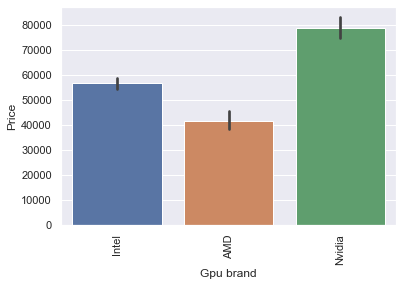

In [85]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df.drop(columns=['Gpu'],inplace=True)

In [87]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel
5,Acer,Notebook,4,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0,AMD


In [88]:
df['OpSys'].value_counts()

Windows 10      1021
No OS             66
Linux             62
Windows 7         42
macOS             11
Windows 10 S       7
Chrome OS          7
Name: OpSys, dtype: int64

In [89]:
def os_category(val):
    if val == 'Windows 10' or val == 'Windows 7' or val == 'Windows 10 S':
        return 'Windows'
    elif val == 'macOS':
        return 'MAC'
    elif val == 'Chrome OS':
        return 'Chrome'
    else:
        return 'Linux/No OS'

In [90]:
df['OS'] = df['OpSys'].apply(os_category)

In [91]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,cpu_name,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,MAC
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,MAC
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,MAC
5,Acer,Notebook,4,Windows 10,2.10,21312.0000,0,0,AMD Processor,500,0,AMD,Windows


In [92]:
df.drop(columns='OpSys', inplace=True)

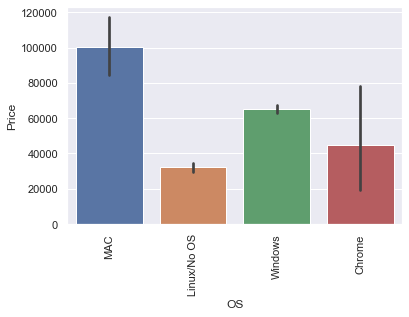

In [93]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Price'>

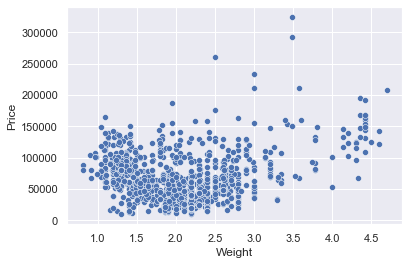

In [94]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<AxesSubplot:>

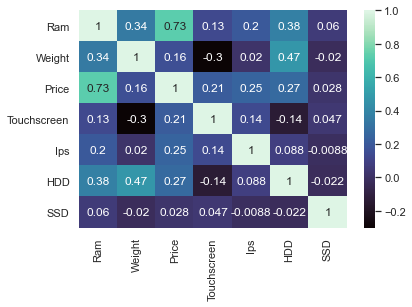

In [95]:
sns.heatmap(df.corr(), annot=True, cmap='mako')

C:\Users\sid10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

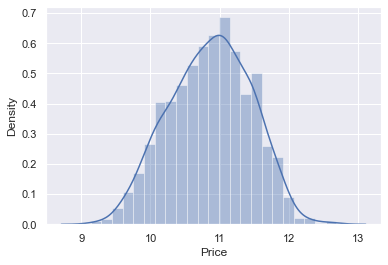

In [96]:
sns.distplot(np.log(df['Price']))

In [97]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [98]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,cpu_name,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,0,128,Intel,MAC
2,HP,Notebook,8,1.86,0,0,Intel Core i5,0,256,Intel,Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,0,512,AMD,MAC
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,0,256,Intel,MAC
5,Acer,Notebook,4,2.10,0,0,AMD Processor,500,0,AMD,Windows
...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,2.20,0,0,Intel Core i7,500,0,Nvidia,Windows
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel Core i7,0,512,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,Intel Core i7,1000,0,AMD,Windows


In [99]:
y

0       11.175755
2       10.329931
3       11.814476
4       11.473101
5        9.967026
          ...    
1297    10.555257
1298    10.433899
1299    11.288115
1301    10.614129
1302     9.886358
Name: Price, Length: 1216, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [101]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,cpu_name,HDD,SSD,Gpu brand,OS
867,Lenovo,2 in 1 Convertible,8,1.37,1,1,Intel Core i7,0,256,Intel,Windows
834,Lenovo,Notebook,8,1.32,0,1,Intel Core i5,0,256,Intel,Windows
174,HP,Notebook,8,2.50,0,0,Intel Core i5,0,256,Nvidia,Windows
504,Lenovo,Netbook,4,1.25,0,0,Other Intel Processor,0,16,Intel,Chrome
1016,HP,Notebook,4,2.04,0,0,Intel Core i3,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...
1108,HP,Notebook,4,2.10,0,0,AMD Processor,1000,0,AMD,Windows
1166,Lenovo,Notebook,8,1.95,0,1,Intel Core i5,0,256,Intel,Windows
1205,Dell,Notebook,8,2.36,0,0,Intel Core i5,0,256,AMD,Windows
913,HP,Notebook,8,2.04,0,0,Intel Core i7,0,256,Nvidia,Windows


In [102]:
y

0       11.175755
2       10.329931
3       11.814476
4       11.473101
5        9.967026
          ...    
1297    10.555257
1298    10.433899
1299    11.288115
1301    10.614129
1302     9.886358
Name: Price, Length: 1216, dtype: float64

### Model Training

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7672056971210839
MAE 0.2069754290951964


In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = SVR()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.11187122673838201
MAE 0.4496083543160158


In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7754792028024626
MAE 0.19196302541215665


In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe4.fit(X_train,y_train)

y_pred = pipe4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8902110229038189
MAE 0.14100807269925952


In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe5.fit(X_train,y_train)

y_pred = pipe5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7951467324664432
MAE 0.21457099360997628


In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe6.fit(X_train,y_train)

y_pred = pipe6.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8093497844997662
MAE 0.1870837132413309


#### Exporting Random Forest since its the best performing model

### Exporting Model

In [112]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe4,open('pipe4.pkl','wb'))